<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/cnn/cnn_lstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, Conv1D, MaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 16s 41ms/step - loss: 0.6255 - accuracy: 0.6056 - val_loss: 0.3189 - val_accuracy: 0.8687
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2666 - accuracy: 0.8923 - val_loss: 0.3296 - val_accuracy: 0.8535
Epoch 3/100
176/176 [==============================] - 6s 35ms/step - loss: 0.2119 - accuracy: 0.9197 - val_loss: 0.3054 - val_accuracy: 0.8758
Epoch 4/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1611 - accuracy: 0.9431 - val_loss: 0.2977 - val_accuracy: 0.8829
Epoch 5/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1356 - accuracy: 0.9534 - val_loss: 0.3199 - val_accuracy: 0.8668
Epoch 6/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1175 - accuracy: 0.9626 - val_loss: 0.3699 - val_accuracy: 0.8744
Epoch 7/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1053 - accuracy: 0.9656 - val_loss: 0.39

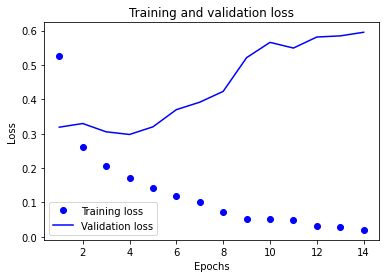

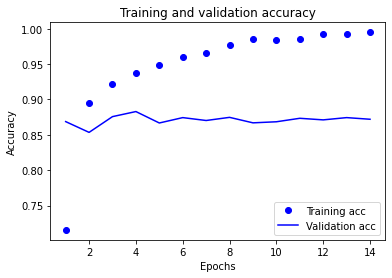

              precision    recall  f1-score   support

           0      0.875     0.894     0.884     12500
           1      0.892     0.872     0.882     12500

    accuracy                          0.883     25000
   macro avg      0.883     0.883     0.883     25000
weighted avg      0.883     0.883     0.883     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 8s 38ms/step - loss: 0.5996 - accuracy: 0.6318 - val_loss: 0.3140 - val_accuracy: 0.8703
Epoch 2/100
176/176 [==============================] - 6s 35ms/step - loss: 0.2574 - accuracy: 0.8998 - val_loss: 0.2898 - val_accuracy: 0.8791
Epoch 3/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1934 - accuracy: 0.9302 - val_loss: 0.2942 - val_accuracy: 0.8776
Epoch 4/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1684 - accuracy: 0.9381 - val_loss: 0.3151 - val_accuracy: 0.8740
Epoch 5/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1

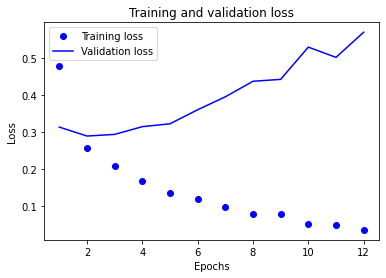

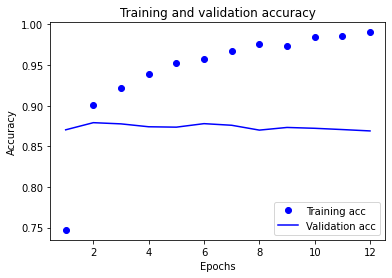

              precision    recall  f1-score   support

           0      0.860     0.905     0.882     12500
           1      0.900     0.853     0.876     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6889 - accuracy: 0.5590 - val_loss: 0.3917 - val_accuracy: 0.8295
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.3296 - accuracy: 0.8628 - val_loss: 0.3193 - val_accuracy: 0.8652
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2347 - accuracy: 0.9096 - val_loss: 0.2978 - val_accuracy: 0.8826
Epoch 4/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1872 - accuracy: 0.9324 - val_loss: 0.3097 - val_accuracy: 0.8754
Epoch 5/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1

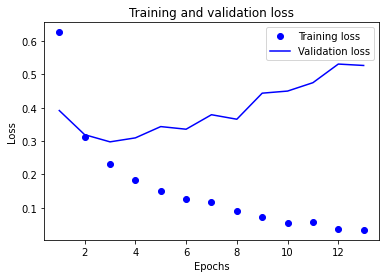

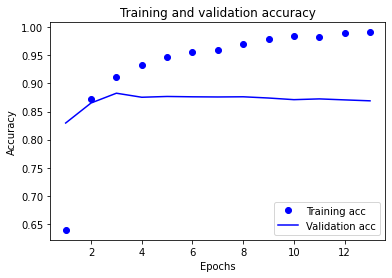

              precision    recall  f1-score   support

           0      0.905     0.854     0.879     12500
           1      0.862     0.911     0.886     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 9s 40ms/step - loss: 0.6269 - accuracy: 0.5979 - val_loss: 0.3270 - val_accuracy: 0.8634
Epoch 2/100
176/176 [==============================] - 6s 35ms/step - loss: 0.2729 - accuracy: 0.8931 - val_loss: 0.3091 - val_accuracy: 0.8718
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2053 - accuracy: 0.9234 - val_loss: 0.3098 - val_accuracy: 0.8727
Epoch 4/100
176/176 [==============================] - 6s 35ms/step - loss: 0.1730 - accuracy: 0.9352 - val_loss: 0.2977 - val_accuracy: 0.8804
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1

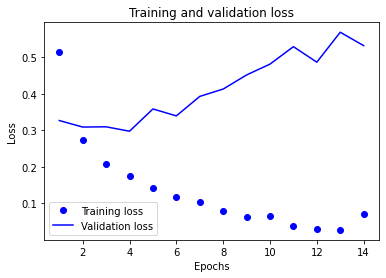

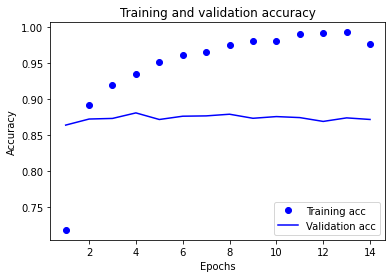

              precision    recall  f1-score   support

           0      0.863     0.905     0.883     12500
           1      0.900     0.856     0.877     12500

    accuracy                          0.880     25000
   macro avg      0.881     0.880     0.880     25000
weighted avg      0.881     0.880     0.880     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 8s 38ms/step - loss: 0.6238 - accuracy: 0.6071 - val_loss: 0.3466 - val_accuracy: 0.8478
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2881 - accuracy: 0.8849 - val_loss: 0.3406 - val_accuracy: 0.8632
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2397 - accuracy: 0.9106 - val_loss: 0.3068 - val_accuracy: 0.8762
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1793 - accuracy: 0.9366 - val_loss: 0.3005 - val_accuracy: 0.8793
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1

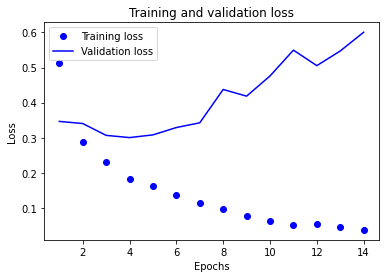

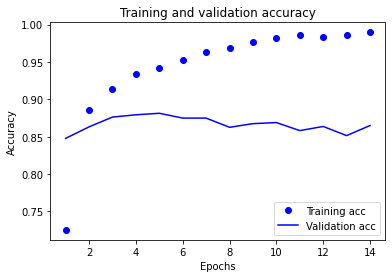

              precision    recall  f1-score   support

           0      0.865     0.898     0.882     12500
           1      0.894     0.860     0.877     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 9s 42ms/step - loss: 0.6565 - accuracy: 0.5725 - val_loss: 0.3686 - val_accuracy: 0.8386
Epoch 2/100
176/176 [==============================] - 6s 37ms/step - loss: 0.3088 - accuracy: 0.8770 - val_loss: 0.2859 - val_accuracy: 0.8836
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2119 - accuracy: 0.9194 - val_loss: 0.2875 - val_accuracy: 0.8851
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1682 - accuracy: 0.9406 - val_loss: 0.2900 - val_accuracy: 0.8816
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1

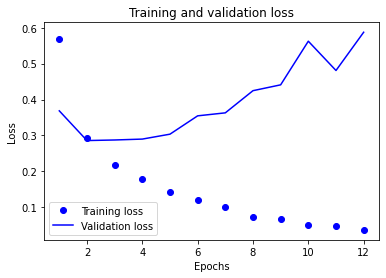

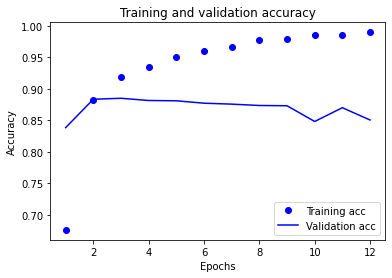

              precision    recall  f1-score   support

           0      0.878     0.891     0.884     12500
           1      0.890     0.876     0.883     12500

    accuracy                          0.884     25000
   macro avg      0.884     0.884     0.884     25000
weighted avg      0.884     0.884     0.884     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6253 - accuracy: 0.6104 - val_loss: 0.3130 - val_accuracy: 0.8699
Epoch 2/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2797 - accuracy: 0.8894 - val_loss: 0.2777 - val_accuracy: 0.8846
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2164 - accuracy: 0.9196 - val_loss: 0.2991 - val_accuracy: 0.8747
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1761 - accuracy: 0.9386 - val_loss: 0.2934 - val_accuracy: 0.8805
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1

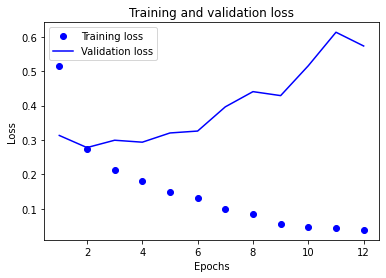

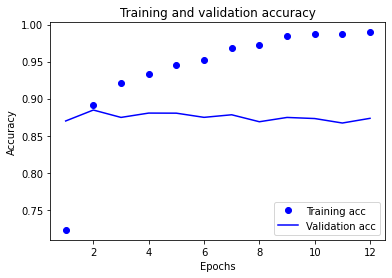

              precision    recall  f1-score   support

           0      0.910     0.853     0.881     12500
           1      0.862     0.916     0.888     12500

    accuracy                          0.885     25000
   macro avg      0.886     0.885     0.885     25000
weighted avg      0.886     0.885     0.885     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 9s 42ms/step - loss: 0.6262 - accuracy: 0.6082 - val_loss: 0.3207 - val_accuracy: 0.8676
Epoch 2/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2719 - accuracy: 0.8917 - val_loss: 0.2802 - val_accuracy: 0.8818
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.2010 - accuracy: 0.9249 - val_loss: 0.2970 - val_accuracy: 0.8843
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1584 - accuracy: 0.9422 - val_loss: 0.3086 - val_accuracy: 0.8810
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1

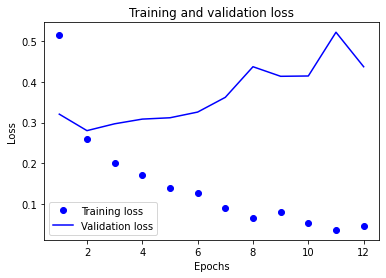

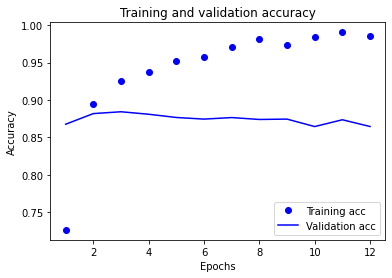

              precision    recall  f1-score   support

           0      0.871     0.896     0.883     12500
           1      0.893     0.868     0.880     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 8s 39ms/step - loss: 0.6059 - accuracy: 0.6320 - val_loss: 0.3819 - val_accuracy: 0.8265
Epoch 2/100
176/176 [==============================] - 6s 37ms/step - loss: 0.2593 - accuracy: 0.9010 - val_loss: 0.2901 - val_accuracy: 0.8819
Epoch 3/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1884 - accuracy: 0.9289 - val_loss: 0.2872 - val_accuracy: 0.8790
Epoch 4/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1533 - accuracy: 0.9468 - val_loss: 0.3156 - val_accuracy: 0.8781
Epoch 5/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1

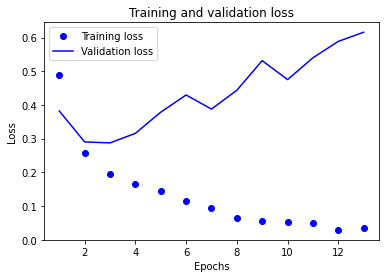

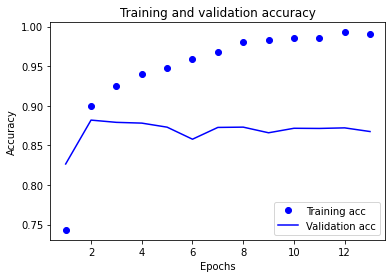

              precision    recall  f1-score   support

           0      0.899     0.853     0.876     12500
           1      0.861     0.905     0.882     12500

    accuracy                          0.879     25000
   macro avg      0.880     0.879     0.879     25000
weighted avg      0.880     0.879     0.879     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 9s 42ms/step - loss: 0.6286 - accuracy: 0.5951 - val_loss: 0.3296 - val_accuracy: 0.8644
Epoch 2/100
176/176 [==============================] - 6s 36ms/step - loss: 0.3110 - accuracy: 0.8728 - val_loss: 0.2834 - val_accuracy: 0.8843
Epoch 3/100
176/176 [==============================] - 6s 37ms/step - loss: 0.1959 - accuracy: 0.9287 - val_loss: 0.2859 - val_accuracy: 0.8818
Epoch 4/100
176/176 [==============================] - 6s 36ms/step - loss: 0.1513 - accuracy: 0.9465 - val_loss: 0.3368 - val_accuracy: 0.8795
Epoch 5/100
176/176 [==============================] - 6s 36ms/step - loss: 0.

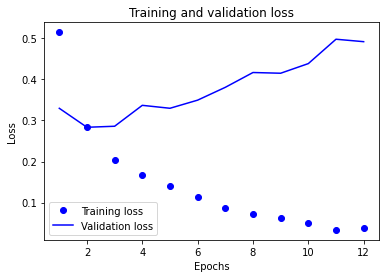

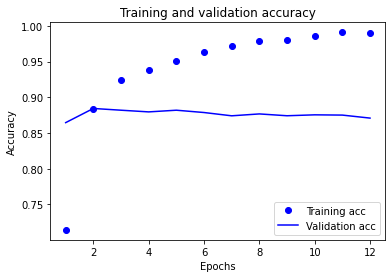

              precision    recall  f1-score   support

           0      0.897     0.869     0.882     12500
           1      0.873     0.900     0.886     12500

    accuracy                          0.884     25000
   macro avg      0.885     0.884     0.884     25000
weighted avg      0.885     0.884     0.884     25000


Average accuracy: 0.8868 (+/- 0.0051)
Average loss: 0.2817 (+/- 0.0141)
Average F1: 0.8817 (+/- 0.0040)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    MaxPool1D(pool_size=2),
    Conv1D(filters=32, kernel_size=3, padding="same", activation="relu"),
    Dropout(rate=dropout_rate),
    LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
